In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#carregar os dados do arquivo txt
data = pd.read_csv('imbi_718_2001_2021.txt', delimiter='\t', header=None)

In [3]:
# Renomear as colunas
data.columns = ['dt', 'hr', 'alt']

In [4]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [5]:
# Converter a coluna 'dt_hrs' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

In [6]:
# Calcula a média da coluna 'mare'
media_mare = 1.580 

# Subtrai a média de todos os valores na coluna 'mare' e adiciona como uma nova coluna
data['alt_zero'] = data['alt'] - media_mare
data['alt_zero'] = data['alt_zero'] * 100

# Exibe os primeiros valores do DataFrame com as colunas originais e a 'mare' centralizada
print(data[['dt', 'hr', 'alt', 'alt_zero',]])

                             dt     hr    alt  alt_zero
dt_hr                                                  
2001-12-01 02:00:00  01/12/2001  02:00  2.045      46.5
2001-12-01 03:00:00  01/12/2001  03:00  2.017      43.7
2001-12-01 04:00:00  01/12/2001  04:00  1.947      36.7
2001-12-01 05:00:00  01/12/2001  05:00  1.849      26.9
2001-12-01 06:00:00  01/12/2001  06:00  1.735      15.5
...                         ...    ...    ...       ...
2021-12-31 19:00:00  31/12/2021  19:00  1.011     -56.9
2021-12-31 20:00:00  31/12/2021  20:00  1.125     -45.5
2021-12-31 21:00:00  31/12/2021  21:00  1.252     -32.8
2021-12-31 22:00:00  31/12/2021  22:00  1.404     -17.6
2021-12-31 23:00:00  31/12/2021  23:00  1.544      -3.6

[176062 rows x 4 columns]


In [7]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dia_hora'] = data['dt'] + ' ' + data['hr']

data['dia_hora'] = pd.to_datetime(data['dia_hora'], format='%d/%m/%Y %H:%M')

# Exibindo o DataFrame atualizado
print(data)

                             dt     hr    alt  alt_zero            dia_hora
dt_hr                                                                      
2001-12-01 02:00:00  01/12/2001  02:00  2.045      46.5 2001-12-01 02:00:00
2001-12-01 03:00:00  01/12/2001  03:00  2.017      43.7 2001-12-01 03:00:00
2001-12-01 04:00:00  01/12/2001  04:00  1.947      36.7 2001-12-01 04:00:00
2001-12-01 05:00:00  01/12/2001  05:00  1.849      26.9 2001-12-01 05:00:00
2001-12-01 06:00:00  01/12/2001  06:00  1.735      15.5 2001-12-01 06:00:00
...                         ...    ...    ...       ...                 ...
2021-12-31 19:00:00  31/12/2021  19:00  1.011     -56.9 2021-12-31 19:00:00
2021-12-31 20:00:00  31/12/2021  20:00  1.125     -45.5 2021-12-31 20:00:00
2021-12-31 21:00:00  31/12/2021  21:00  1.252     -32.8 2021-12-31 21:00:00
2021-12-31 22:00:00  31/12/2021  22:00  1.404     -17.6 2021-12-31 22:00:00
2021-12-31 23:00:00  31/12/2021  23:00  1.544      -3.6 2021-12-31 23:00:00

[176062 row

In [8]:
# Construindo a matriz A0 para regressão linear
fft_A0 = np.column_stack([np.ones(len(data)), data['dia_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
fft_x0 = np.linalg.lstsq(fft_A0, data['alt_zero'], rcond=None)[0]
mod_fft = fft_A0.dot(fft_x0) #tendencia estimada

#subtração da tendencia
altura_tend = data['alt_zero'] - mod_fft

In [9]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('dia_hora', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['alt_zero'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

dia_hora
2001-12-31    -2.104447
2002-01-31   -12.248656
2002-02-28    -4.754464
2002-03-31    -4.576075
2002-04-30    -2.837083
                ...    
2021-08-31    -3.731855
2021-09-30    -8.725833
2021-10-31    -3.380780
2021-11-30    -4.591111
2021-12-31    -3.905914
Freq: ME, Name: alt_zero, Length: 241, dtype: float64


C:\Users\labdi\AppData\Local\Temp\ipykernel_6808\2617270548.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = data['alt_zero'].resample('M').mean()


In [10]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df = pd.DataFrame({
    'data_hora': media_mensal.index,
    'alt_zero': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df)

     data_hora   alt_zero
0   2001-12-31  -2.104447
1   2002-01-31 -12.248656
2   2002-02-28  -4.754464
3   2002-03-31  -4.576075
4   2002-04-30  -2.837083
..         ...        ...
236 2021-08-31  -3.731855
237 2021-09-30  -8.725833
238 2021-10-31  -3.380780
239 2021-11-30  -4.591111
240 2021-12-31  -3.905914

[241 rows x 2 columns]


In [11]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df)), df['data_hora'].apply(lambda x: x.to_julian_date())])
#x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

In [12]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df['ano'] = df['data_hora'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df['ano'], df['alt_zero'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)


Tendência por ano: 0.40031281447689854
Incerteza: 0.08060482167141098


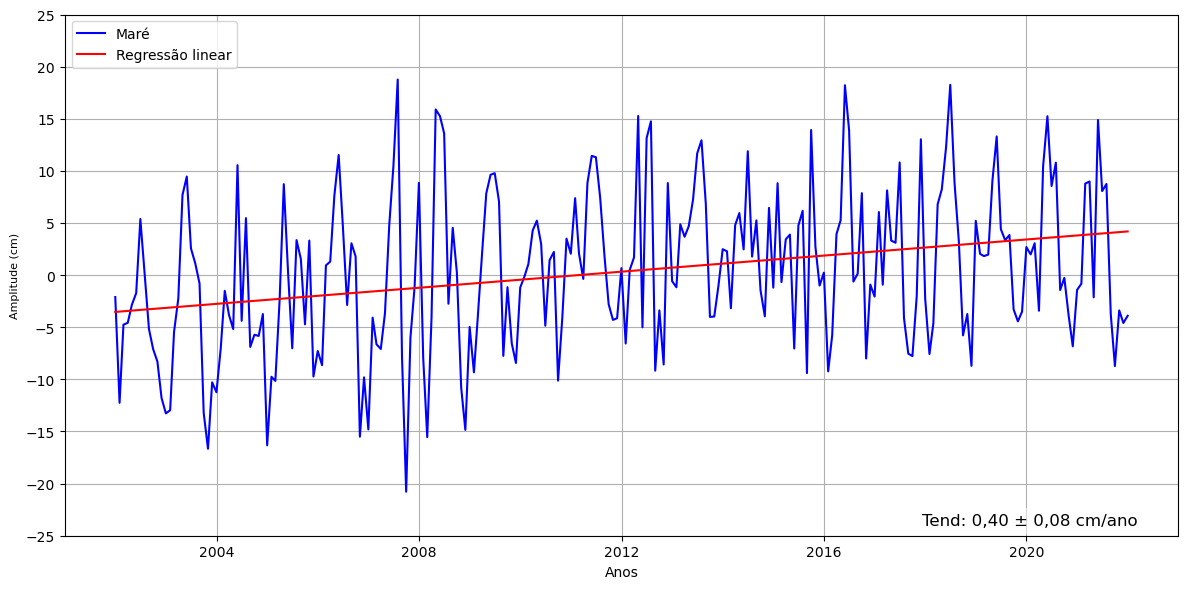

In [17]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '0,40 ± 0,08'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['alt_zero'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(df['data_hora'], alt_est, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

#plt.title('Nível médio anual mar em Imbituba', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(-25 , 25)
plt.yticks(range(-25, 26, 5))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
#plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_Imbituba_semtitulo.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()


In [51]:
df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/tend_Imbituba.csv', index=False)

In [18]:
import numpy as np

# Calcule o desvio padrão da série de dados 'alt_zero'
desvio = np.std(df['alt_zero'])

# Exiba o desvio padrão
print("Desvio padrão:", desvio)

Desvio padrão: 7.583107951404924


In [19]:
#remover a tendencia para plotar realizar o fft

altura_detrend = df['alt_zero'] - alt_est

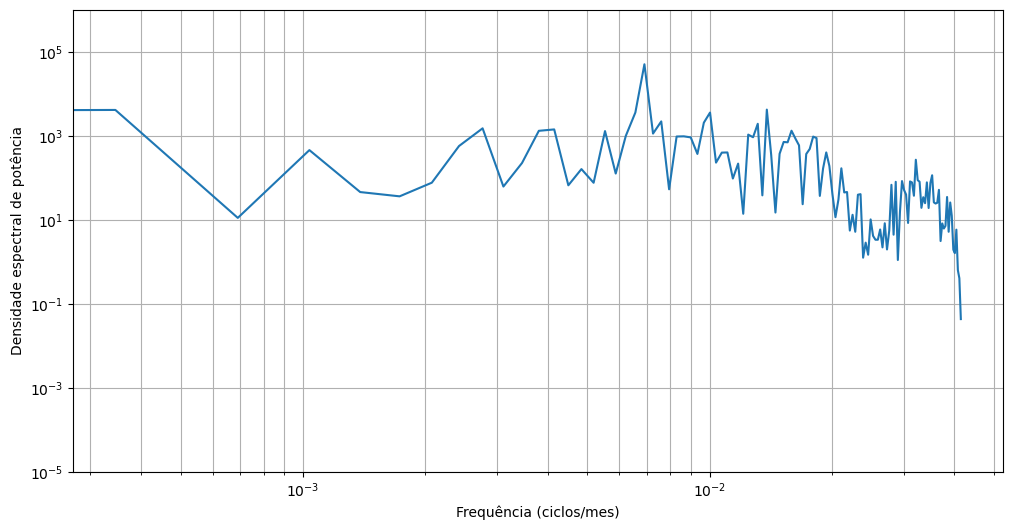

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, periodogram

# Suavizando os dados de altura_detrend usando o filtro Savitzky-Golay
tmp = savgol_filter(altura_detrend, window_length=6, polyorder=2)

# Calculando o espectro de potência usando o periodograma
f, p = periodogram(tmp, fs=1/12)

# Plotagem do gráfico
plt.figure(figsize=(12, 6))

# Plotando o espectro de potência em escala log-log
plt.loglog(f, p)
plt.grid(which='both')  # Adiciona grade nos eixos x e y
plt.xlabel('Frequência (ciclos/mes)')
plt.ylabel('Densidade espectral de potência')

# Ajuste do limite no eixo y
plt.ylim(1e-5 , 1e6)
#plt.ylim(range(1e-5, 1e6, 1e3))
plt.show()


In [12]:
# Calcular a média móvel de 12 períodos com janelas centradas
df['Media_Movel_12'] = df['alt_zero'].rolling(window=12, center=True).sum()

In [13]:
df['Media_Movel_2_Centrada'] = df['Media_Movel_12'].rolling(window=2, center=True).sum()

In [14]:
# Calculando a média móvel centrada dividida por 24
df['Media_Movel_Centrada'] = df['Media_Movel_2_Centrada'] / 24

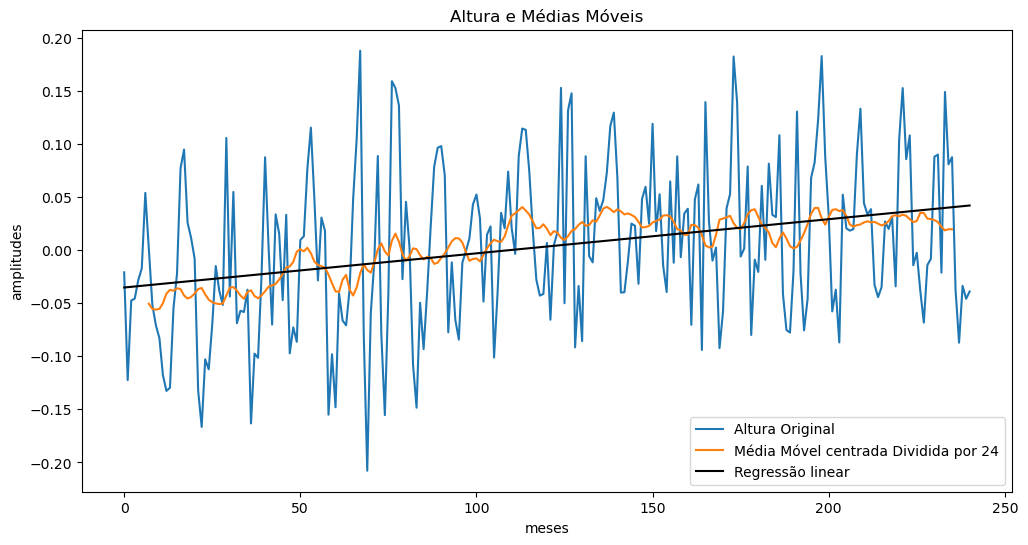

In [15]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df['alt_zero'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [16]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
df['indices_sazonais'] = df['alt_zero'] - df['Media_Movel_Centrada']

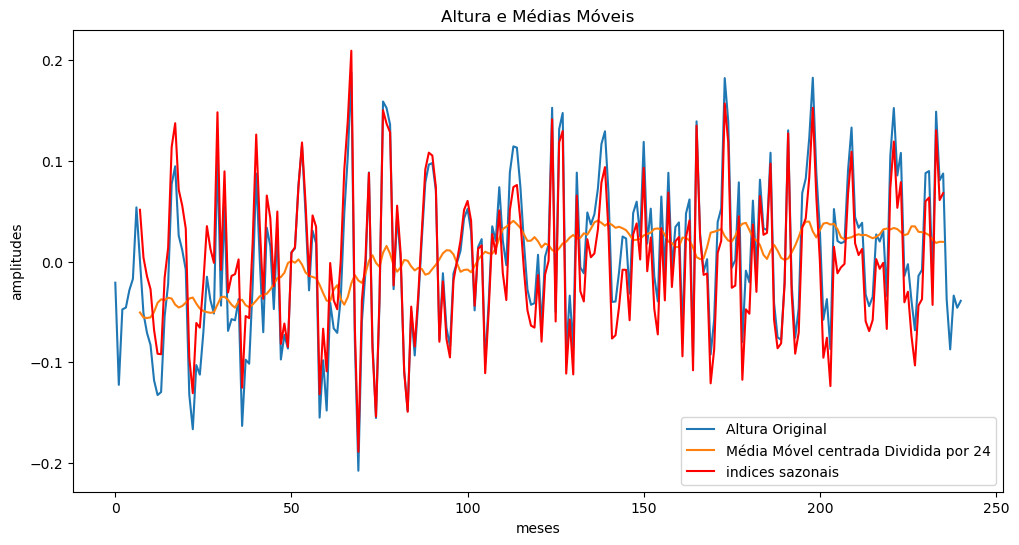

In [17]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(df['alt_zero'], label='Altura Original')


plt.plot(df['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(df['indices_sazonais'], 'r', label='indices sazonais')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [18]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = df['data_hora'].dt.month

In [19]:
#adicionar acoluna de meses no Dataframe como 'mensal'
df['mensal'] = df['data_hora'].dt.month

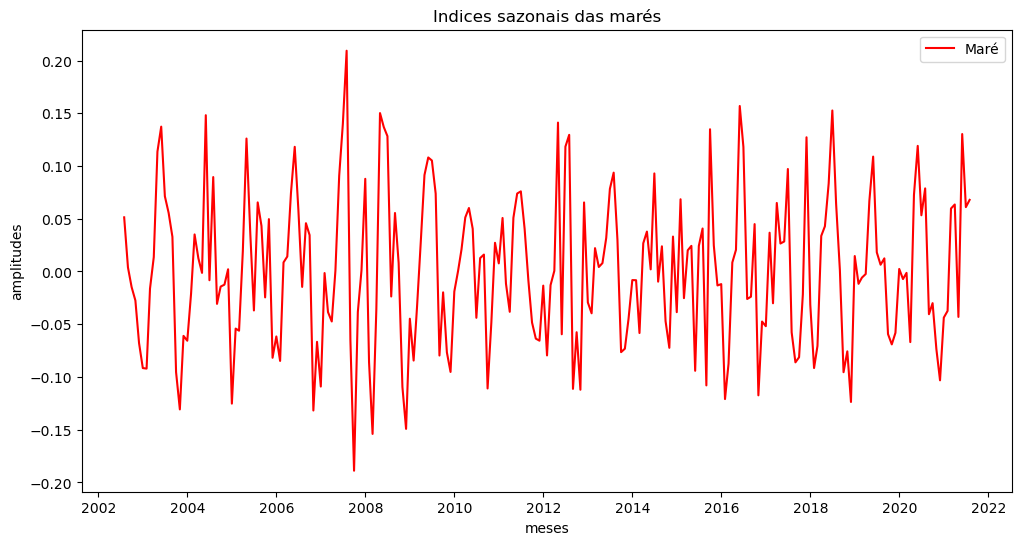

In [20]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [21]:
#liste de nomes dos meses 
meses = ['jan', 'fev', 'mar', 
        'abr', 'maio', 'jun',
        'jul', 'ago', 'set',
        'out', 'nov', 'dez']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = df[df['data_hora'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()

In [22]:
medias_ind_sazonal

{'jan': -0.03492736375491008,
 'fev': -0.023958344122166585,
 'mar': 0.00903360774024807,
 'abr': 0.056002122033934794,
 'maio': 0.07359364967415989,
 'jun': 0.06865119974332924,
 'jul': 0.047400201091811534,
 'ago': -0.015213028353233848,
 'set': -0.0390575497078637,
 'out': -0.06211296700193895,
 'nov': -0.038008862135718725,
 'dez': -0.03331297211103785}

In [23]:
#criar um novo dataframe para e transfromar o dicionario em conjuntos

# Criando o DataFrame
df1 = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df1

,mes_nome,media_indice_sazonal
0,jan,-0.034927
1,fev,-0.023958
2,mar,0.009034
3,abr,0.056002
4,maio,0.073594
5,jun,0.068651
6,jul,0.047400
7,ago,-0.015213
8,set,-0.039058
9,out,-0.062113


In [24]:
#Fazendo a soma, para que dei 0 segundo a definição do modelo adetivo o somatorio das média dos indices sazonais tem que ser igual a zero
soma_md_indices = sum(df1['media_indice_sazonal'])

In [25]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.0006741410913844829

In [26]:
#indices corrigidos
df1['media_indice_corrigido'] = df1['media_indice_sazonal'] - excesso
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,jan,-0.034927,-0.035602
1,fev,-0.023958,-0.024632
2,mar,0.009034,0.008359
3,abr,0.056002,0.055328
4,maio,0.073594,0.072920
5,jun,0.068651,0.067977
6,jul,0.047400,0.046726
7,ago,-0.015213,-0.015887
8,set,-0.039058,-0.039732
9,out,-0.062113,-0.062787


In [27]:
import scipy.io as sio
# Salvar o DataFrame em um arquivo .mat
sio.savemat('Imbituba.mat', {'Imbituba': df1.to_dict(orient='list')})

In [28]:
sum(df1['media_indice_corrigido'])

4.163336342344337e-17

In [29]:
df1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_imbituba.csv', index=False)

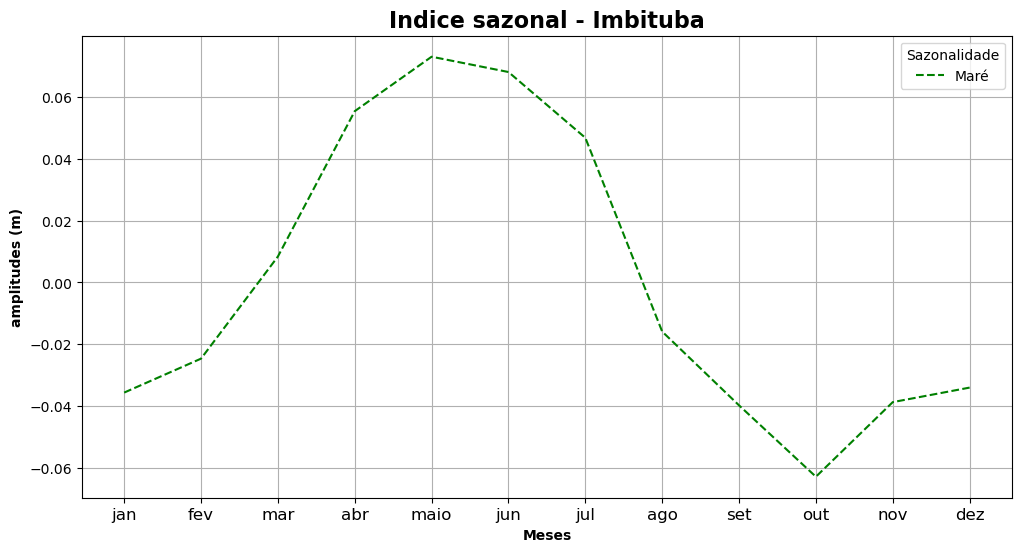

In [30]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['mes_nome'], df1['media_indice_corrigido'], linestyle='--', color='g', label='Maré') 
plt.title('Indice sazonal - Imbituba', fontsize=16, fontweight='bold')

# Adicione uma legenda ao gráfico
plt.legend(title='Sazonalidade')
plt.xlabel('Meses', fontweight='bold')
plt.ylabel('amplitudes (m)' , fontweight='bold')
plt.xticks(fontsize=12)  # Ajuste o tamanho da fonte dos rótulos no eixo x
plt.grid(True)
plt.show()

In [31]:
# Supondo que 'data' seja o nome do seu DataFrame
df['data_hora'] = pd.to_datetime(df['data_hora'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
df['anomes'] = df['data_hora'].dt.strftime('%Y-%m')

In [32]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'jan': 1,
    'fev': 2,
    'mar': 3,
    'abr': 4,
    'maio': 5,
    'jun': 6,
    'jul': 7,
    'ago': 8,
    'set': 9,
    'out': 10,
    'nov': 11,
    'dez': 12
}


# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df1['mes'] = df1['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df1 = df1.sort_values(by='mes')

In [33]:
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido,mes
0,jan,-0.034927,-0.035602,1
1,fev,-0.023958,-0.024632,2
2,mar,0.009034,0.008359,3
3,abr,0.056002,0.055328,4
4,maio,0.073594,0.072920,5
5,jun,0.068651,0.067977,6
6,jul,0.047400,0.046726,7
7,ago,-0.015213,-0.015887,8
8,set,-0.039058,-0.039732,9
9,out,-0.062113,-0.062787,10


In [34]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
df['indices_sazonais'] = df['mensal'].map(df1.set_index('mes')['media_indice_corrigido'])

In [35]:
df

,data_hora,alt_zero,Media_Movel_12,Media_Movel_2_Centrada,Media_Movel_Centrada,indices_sazonais,mensal,anomes
0,2001-12-31,-0.021044,NaN,NaN,NaN,-0.033987,12,2001-12
1,2002-01-31,-0.122487,NaN,NaN,NaN,-0.035602,1,2002-01
2,2002-02-28,-0.047545,NaN,NaN,NaN,-0.024632,2,2002-02
3,2002-03-31,-0.045761,NaN,NaN,NaN,0.008359,3,2002-03
4,2002-04-30,-0.028371,NaN,NaN,NaN,0.055328,4,2002-04
...,...,...,...,...,...,...,...,...
236,2021-08-31,-0.037319,NaN,NaN,NaN,-0.015887,8,2021-08
237,2021-09-30,-0.087258,NaN,NaN,NaN,-0.039732,9,2021-09
238,2021-10-31,-0.033808,NaN,NaN,NaN,-0.062787,10,2021-10
239,2021-11-30,-0.045911,NaN,NaN,NaN,-0.038683,11,2021-11


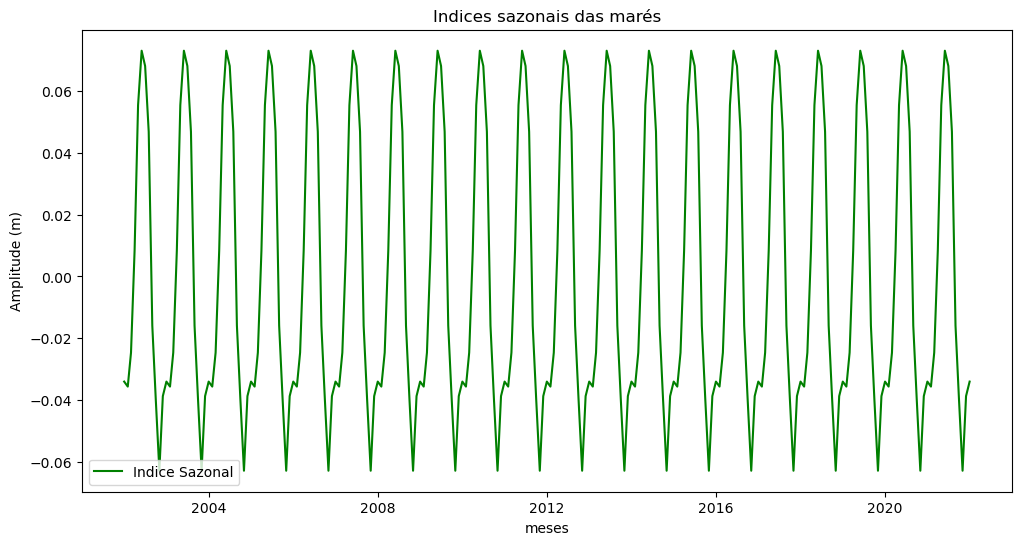

In [36]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['indices_sazonais'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [37]:
# ciclo anual
df['ciclo_anual'] = df['alt_zero'] - alt_est - df['indices_sazonais']

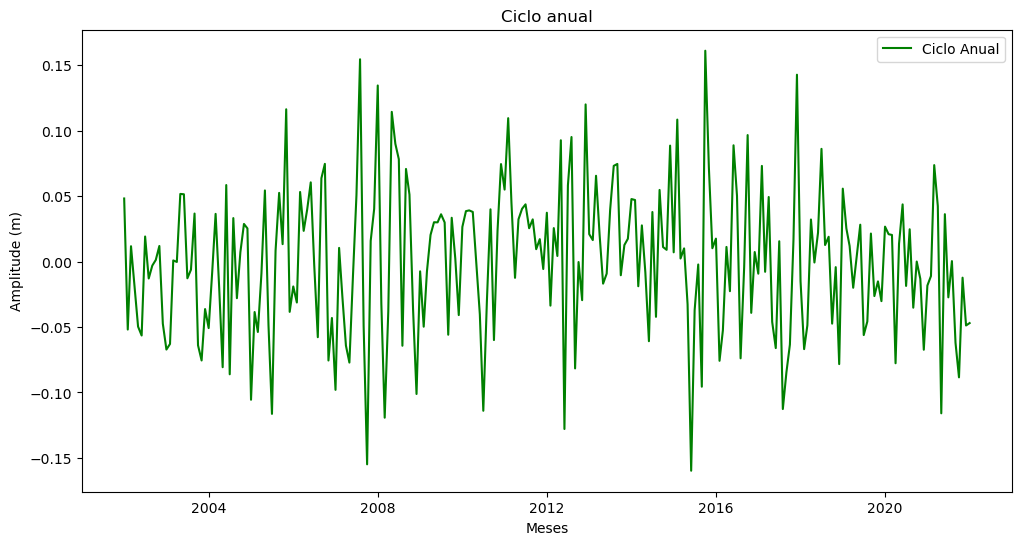

In [38]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['ciclo_anual'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

In [39]:
data

,dt,hr,alt,alt_zero
dia_hora,,,,
2001-12-01 02:00:00,01/12/2001,02:00,2.045,0.465
2001-12-01 03:00:00,01/12/2001,03:00,2.017,0.437
2001-12-01 04:00:00,01/12/2001,04:00,1.947,0.367
2001-12-01 05:00:00,01/12/2001,05:00,1.849,0.269
2001-12-01 06:00:00,01/12/2001,06:00,1.735,0.155
...,...,...,...,...
2021-12-31 19:00:00,31/12/2021,19:00,1.011,-0.569
2021-12-31 20:00:00,31/12/2021,20:00,1.125,-0.455
2021-12-31 21:00:00,31/12/2021,21:00,1.252,-0.328


In [40]:
# Extrair o ano de cada data e hora (como a coluna 'data_hora' está indexada, usamos data.index.year)
data['Ano'] = data.index.year
# Calcular a média anual da maré para cada ano
media_anual = data.groupby('Ano')['alt_zero'].mean()

# Calcular a variabilidade interanual (por exemplo, usando o desvio padrão)
variabilidade_interanual = media_anual.std()

print("Variabilidade Interanual da Maré:", variabilidade_interanual)

Variabilidade Interanual da Maré: 0.027353249808893934


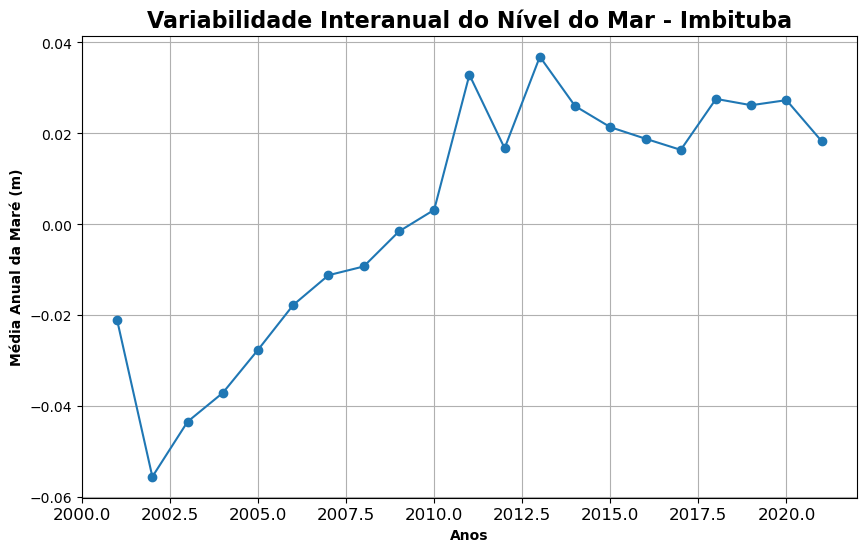

In [41]:

plt.figure(figsize=(10, 6))
plt.plot(media_anual.index, media_anual.values, marker='o', linestyle='-')
plt.title('Variabilidade Interanual do Nível do Mar - Imbituba', fontsize=16, fontweight='bold')
plt.xlabel('Anos', fontweight='bold')
plt.ylabel('Média Anual da Maré (m)', fontweight='bold')
plt.xticks(fontsize=12)  # Ajuste o tamanho da fonte dos rótulos no eixo x
plt.grid(True)
plt.show()

In [42]:
#df.to_csv('D:/Sazonalidade/dataframe_sazonalidades/variação_interna_Imbituba.csv', index=False)

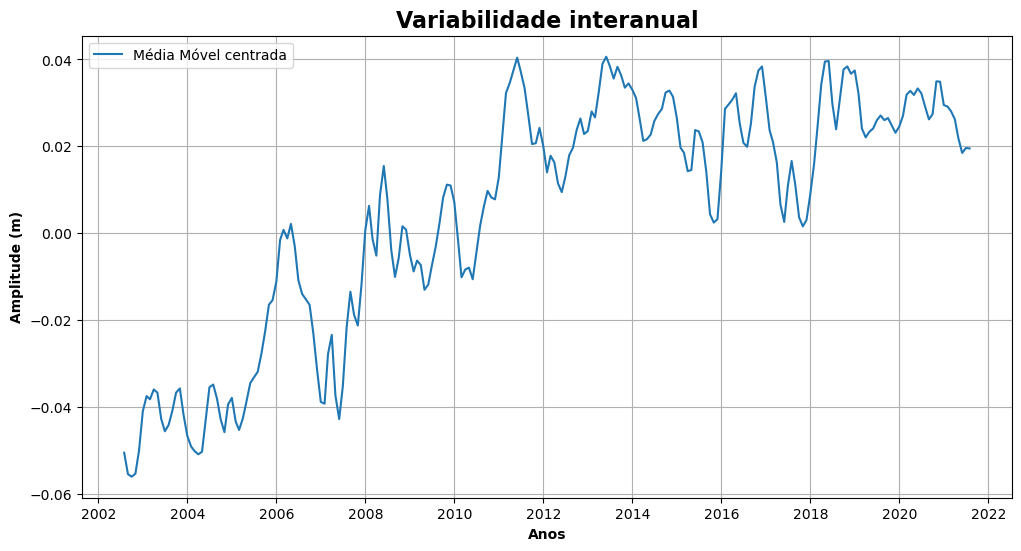

In [43]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['Media_Movel_Centrada'], label= 'Média Móvel centrada')
plt.grid(True)
plt.xlabel('Anos', fontweight='bold')
plt.ylabel('Amplitude (m)', fontweight='bold')
plt.title('Variabilidade interanual',fontsize=16, fontweight='bold')
plt.legend()
plt.show()

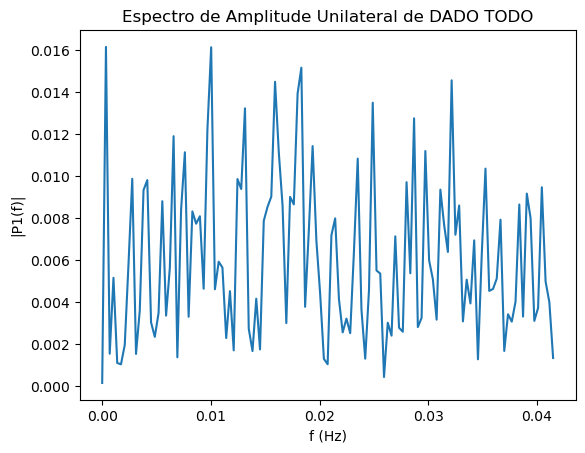

In [44]:
Fs = 1 / 12  # Frequência de amostragem                    
T = 1 / Fs  # Período de amostragem       
L = len(df['ciclo_anual'])  # Comprimento do sinal
t = np.arange(0, L) * T  # Vetor de tempo

# Calcular a Transformada de Fourier
fft_altura = np.fft.fft(df['ciclo_anual'])
P2 = np.abs(fft_altura / L)
P1 = P2[0:L//2+1]
P1[1:-1] = 2 * P1[1:-1]

# Frequências
f = Fs * np.arange(0, L//2+1) / L

# Plotar o espectro de amplitude unidirecional
plt.figure(2)
plt.plot(f, P1)
plt.title('Espectro de Amplitude Unilateral de DADO TODO')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()


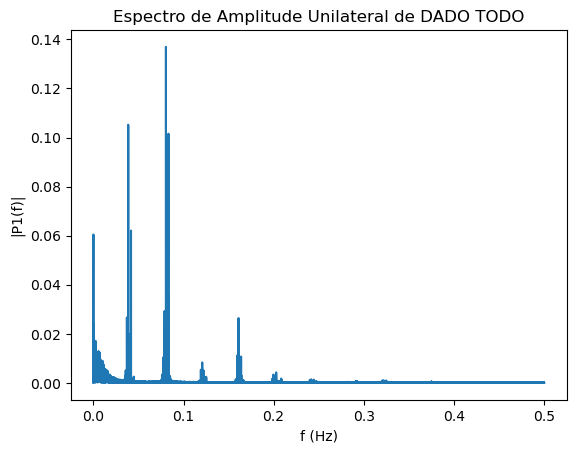

In [45]:
Fs = 1   # Frequência de amostragem                    
T = 1 / Fs  # Período de amostragem       
L = len(altura_tend)  # Comprimento do sinal
t = np.arange(0, L) * T  # Vetor de tempo

# Calcular a Transformada de Fourier
fft_altura = np.fft.fft(altura_tend)
P2 = np.abs(fft_altura / L)
P1 = P2[0:L//2+1]
P1[1:-1] = 2 * P1[1:-1]

# Frequências
f = Fs * np.arange(0, L//2+1) / L

# Plotar o espectro de amplitude unidirecional
plt.figure(2)
plt.plot(f, P1)
plt.title('Espectro de Amplitude Unilateral de DADO TODO')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()